,age,height,gender
0,29.9,165.1,male
1,32.6,190.5,male
2,29.2,189.8,male
3,31.5,163.9,male
4,28.8,157.7,male
...,...,...,...
1995,24.9,173.9,female
1996,30.5,177.5,female
1997,24.5,176.2,female
1998,23.3,175.8,female


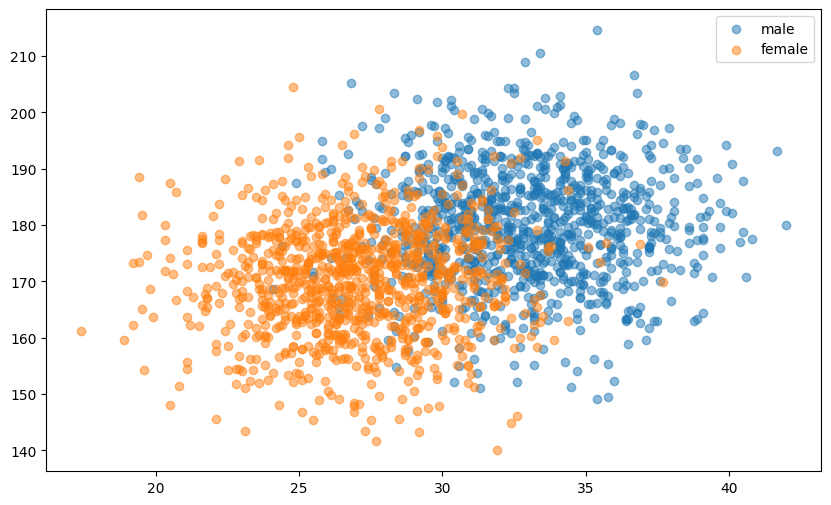

In [62]:
import pandas as pd
import random
import matplotlib.pyplot as plt

class ClusterGenerator():
    def column(self, name, center=30, spread=5):
        return name, center, spread

    def generate_one_column(length, center, spread):
        return [random.gauss(center, spread) for _ in range(length)]

    def generate(self, rows, columns):
        return pd.DataFrame(dict(map(lambda x: (x[0], [round(random.gauss(x[1], x[2]), 1) for _ in range(rows)]), columns)))

cg = ClusterGenerator()

male_df = cg.generate(1000, [
        cg.column('age', center=33, spread=3),
        cg.column('height', center=180, spread=10)
        ])
male_df['gender'] = 'male'

female_df = cg.generate(1000, [
        cg.column('age', center=27, spread=3),
        cg.column('height', center=170, spread=10)
        ])
female_df['gender'] = 'female'

df = pd.concat([male_df, female_df]).reset_index(drop=True)
display(df)

plt.figure(figsize=(10,6))
for gender in df.gender.unique():
    plt.scatter(
    df[df.gender == gender]['age'],
    df[df.gender == gender]['height'],
    alpha = 0.5,
    label = gender
    )
plt.legend()
plt.show()